In [47]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


In [48]:
# Load and preprocess the dataset

(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()


In [49]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [50]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [51]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

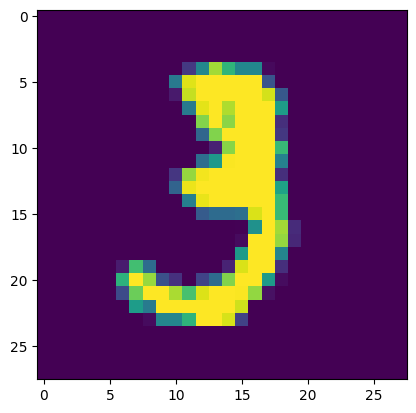

In [52]:
# Plot a sample image from the training set

plt.imshow(X_train[10])


In [53]:
X_train, X_test = X_train / 255.0, X_test / 255.0


In [54]:
# Build the model

model= Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(11,activation='softmax'))
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               100480    
                                                                 
 dense_7 (Dense)             (None, 32)                4128      
                                                                 
 dense_8 (Dense)             (None, 11)                363       
                                                                 
Total params: 104971 (410.04 KB)
Trainable params: 104971 (410.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [55]:
# Compile the model

model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

# Train the model

history = model.fit(X_train,y_train,epochs=10,validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2967 - accuracy: 0.9133 - val_loss: 0.1671 - val_accuracy: 0.9503
Epoch 2/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1227 - accuracy: 0.9629 - val_loss: 0.1055 - val_accuracy: 0.9682
Epoch 3/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0863 - accuracy: 0.9735 - val_loss: 0.1060 - val_accuracy: 0.9695
Epoch 4/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0644 - accuracy: 0.9804 - val_loss: 0.0940 - val_accuracy: 0.9722
Epoch 5/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0510 - accuracy: 0.9837 - val_loss: 0.0976 - val_accuracy: 0.9712
Epoch 6/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0379 - accuracy: 0.9881 - val_loss: 0.1033 - val_accuracy: 0.9720
Epoch 7/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0330 - accuracy: 0.9895 - val_loss: 0.0949 - val_accuracy:

In [56]:
# Evaluate the model

y_prob = model.predict(X_test)
y_pred = y_prob.argmax(axis=1)
accuracy_score(y_test,y_pred)

313/313 [==============================] - 1s 3ms/step


0.9731

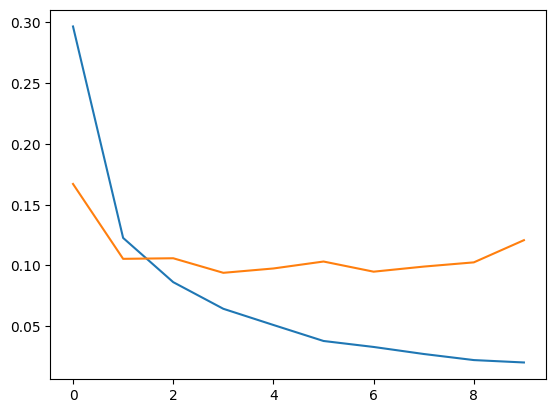

In [57]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])


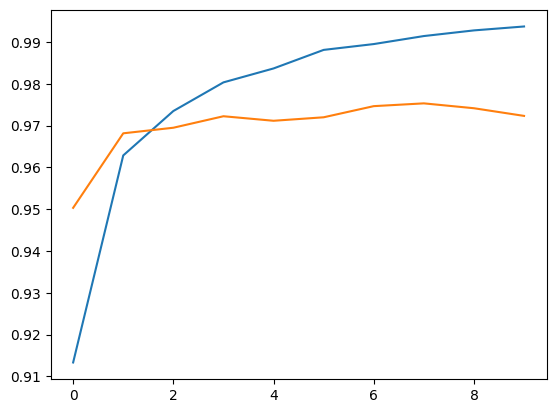

In [58]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])


1/1 [==============================] - 0s 20ms/step


array([4])

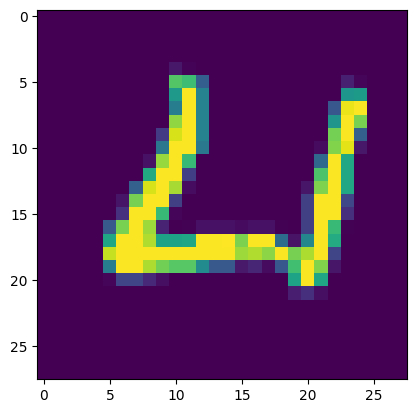

In [59]:
plt.imshow(X_test[33])
model.predict(X_test[33].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 26ms/step


array([7])

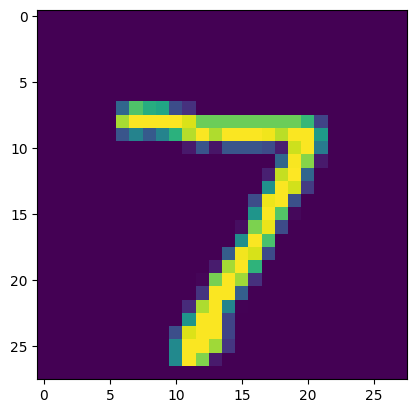

In [60]:
plt.imshow(X_test[0])
model.predict(X_test[0].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 25ms/step


array([0])

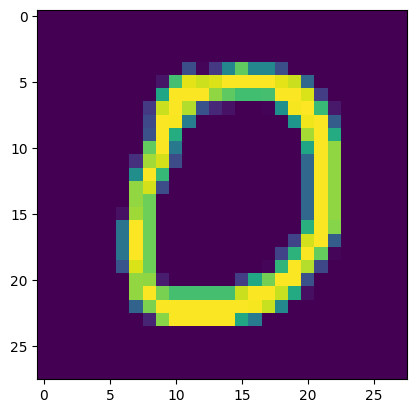

In [61]:
plt.imshow(X_test[10])
model.predict(X_test[10].reshape(1,28,28)).argmax(axis=1)

In [62]:
# Save the model

model.save('mnist_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [63]:
!pip install streamlit streamlit-drawable-canvas tensorflow numpy Pillow opencv-python pandas


In [85]:
%%writefile app.py

import numpy as np
import tensorflow as tf
import streamlit as st
from PIL import Image

# page name
st.set_page_config('Digit Recognition', page_icon= '🔢')

# example of the title, markdown, etc
st.title('Handwritten Digit Recognition 🔢')
st.caption('by Azka Redhia')

st.markdown(r'''This simple application is designed to recognize a number from 0-9 from a PNG file with a resolution of 28x28 pixels.
            While it may not achieve 100% accuracy, but its performance is consistently high.''')
st.subheader('Have fun giving it a try!!! 😊')
# Load your model
model = tf.keras.models.load_model('mnist_model.h5')

# Example of Streamlit file uploader and processing
uploaded_image = st.file_uploader('Upload an image', type=['png', 'jpg'])

if uploaded_image is not None:
    # Open and resize the image
    img = Image.open(uploaded_image)
    img_resized = img.resize((28, 28))  # Resize to 28x28 pixels

    # Convert image to grayscale and normalize
    img_array = np.array(img_resized.convert('L'))
    img_array = img_array.reshape(1, 28, 28, 1)  # Reshape to (1, 28, 28, 1) for model input
    img_array = img_array.astype('float32') / 255.0  # Normalize pixel values

    # Make prediction
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction)

    # Display result
    st.image(img_resized, caption='Uploaded Image')
    st.write(f'Predicted Digit: {predicted_class}')

Writing app.py


In [86]:
!streamlit run app.py






  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://35.194.67.98:8501

  Stopping...
^C


In [87]:
!pip install pipreqs


In [88]:
!pipreqs


INFO: Not scanning for jupyter notebooks.
